### Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('sales_data_with_discounts.csv')

In [4]:
df.shape

(450, 13)

In [5]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [7]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns
cat_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

### ●	Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

In [9]:
df[num_cols].mean()

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [10]:
df[num_cols].mode().values

array([[3.00000000e+00, 4.00000000e+02, 2.43000000e+04, 5.00782219e+00,
        6.91779423e+01, 3.26974801e+02],
       [           nan, 4.50000000e+02,            nan, 5.05521841e+00,
        7.30251994e+01, 3.30822058e+02],
       [           nan, 5.00000000e+02,            nan, 5.05980128e+00,
        9.36491614e+01, 4.66350839e+02],
       ...,
       [           nan,            nan,            nan, 1.99768789e+01,
        2.14966754e+04, 1.63967080e+05],
       [           nan,            nan,            nan, 1.99822566e+01,
        2.53282242e+04, 1.66263161e+05],
       [           nan,            nan,            nan, 1.99924070e+01,
        2.57380222e+04, 1.79507479e+05]])

In [11]:
df[num_cols].median()

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [12]:
df[num_cols].std()

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

### ●	Histograms:
	Plot histograms for each numerical column.
	Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences


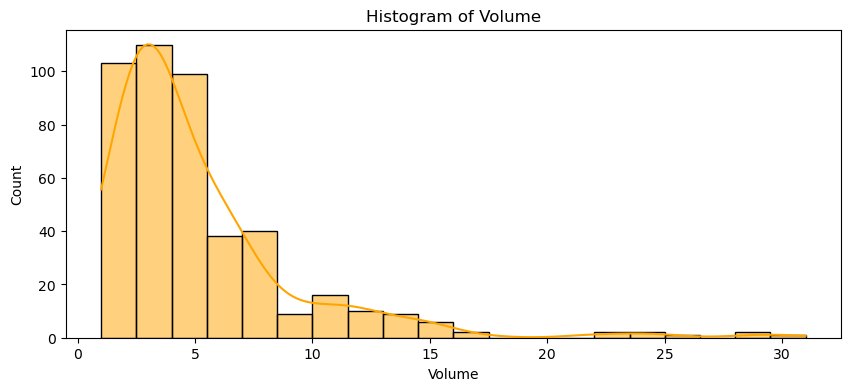

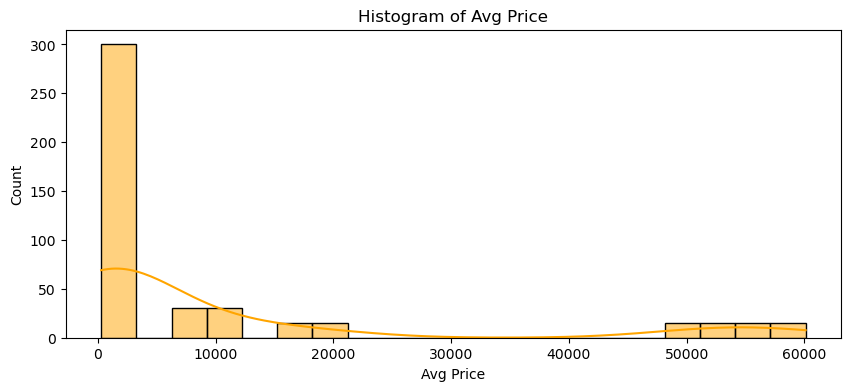

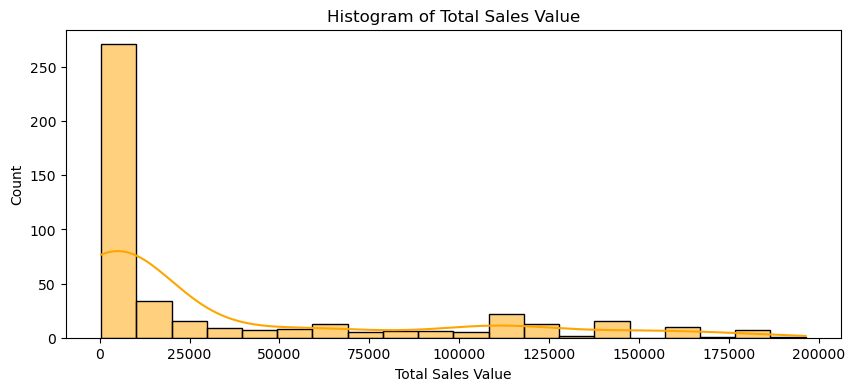

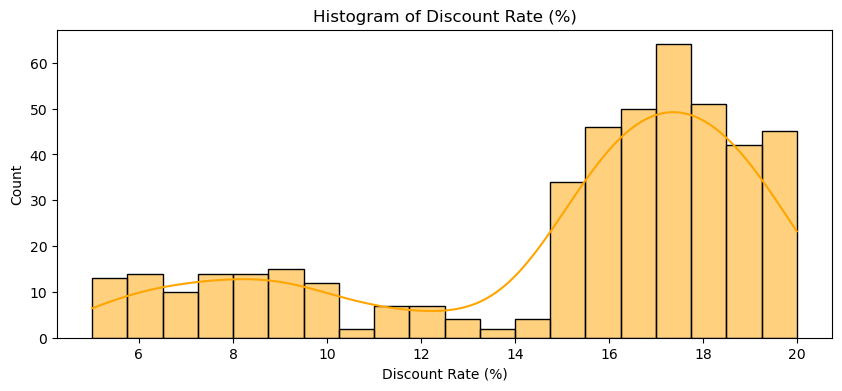

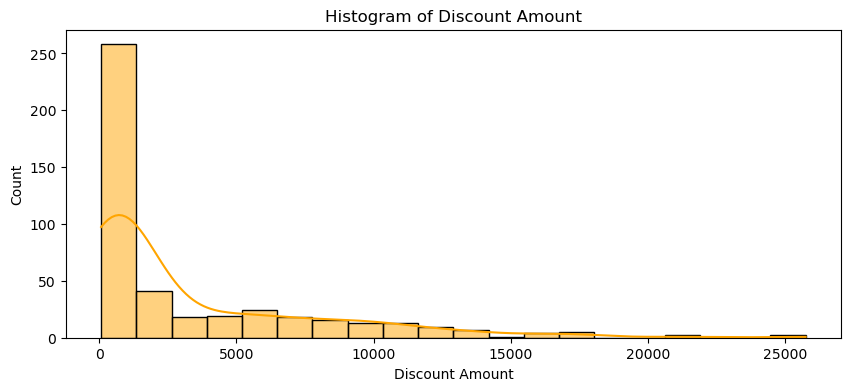

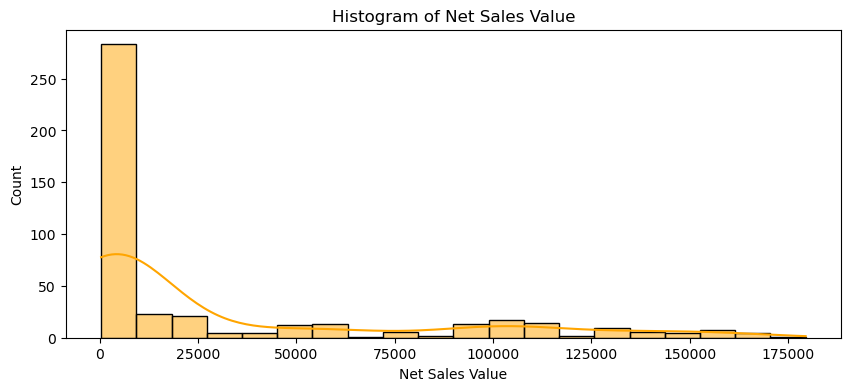

In [14]:
for col,clr in zip(list(num_cols),clr_list):
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True, bins=20,color='orange')
    plt.title(f"Histogram of {col}")
    plt.show()

### ●	Box Plots:
	Create boxplots for numerical variables to identify outliers and the interquartile range.
	Discuss any findings, such as extreme values or unusual distributions


In [ ]:
for col,clr in zip(list(num_cols),clr_list):
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col],color=clr)
    plt.title(f"Boxplot of {col}")
    plt.show()

### ●	Bar Chart Analysis for Categorical Column:
	Identify categorical columns in the dataset.
	Create bar charts to visualize the frequency or count of each category.
	Analyze the distribution of categories and provide insights.


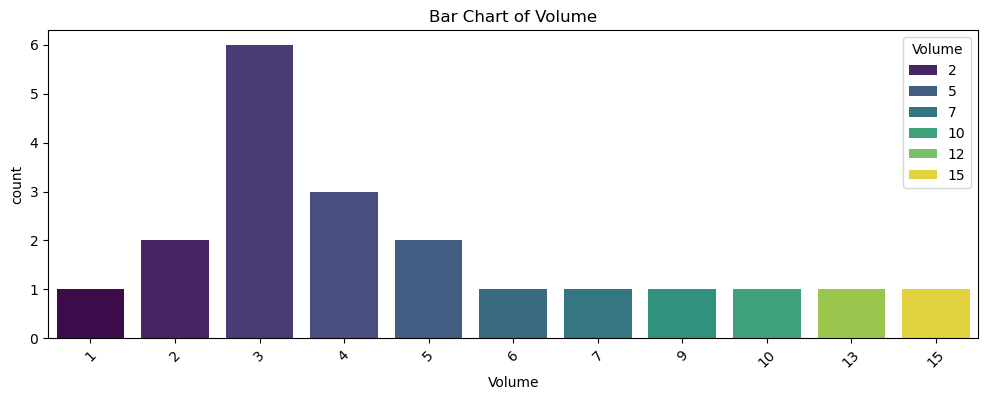

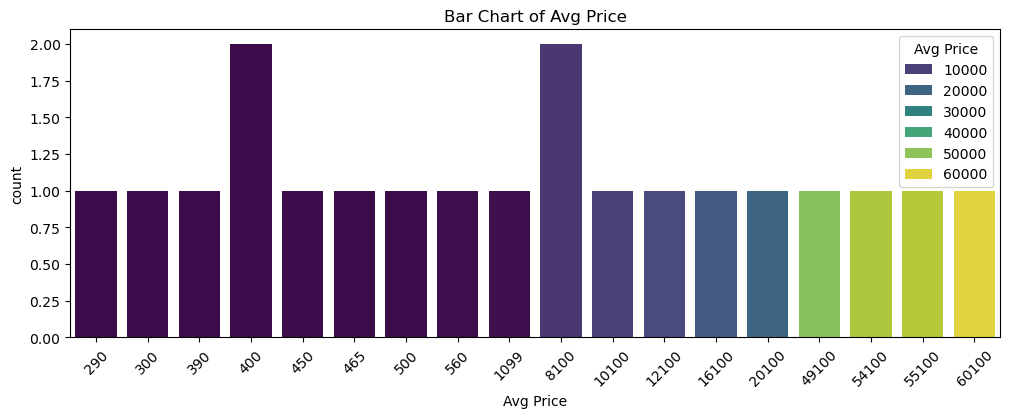

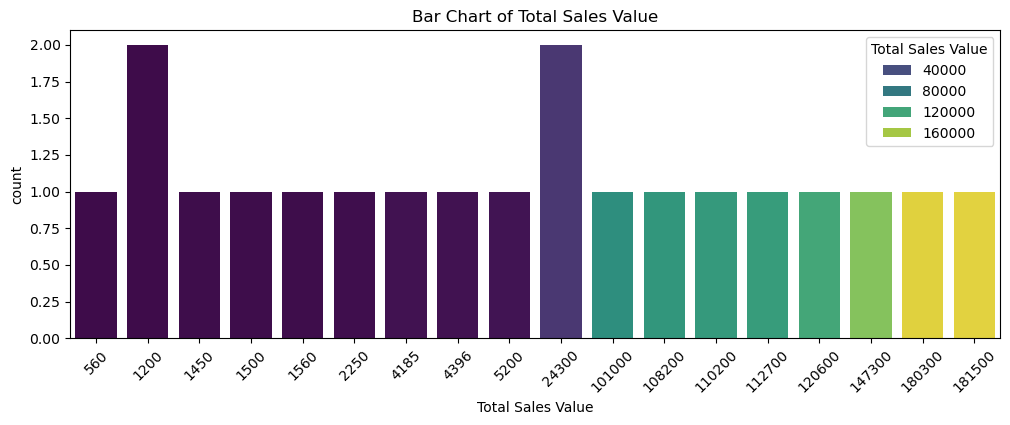

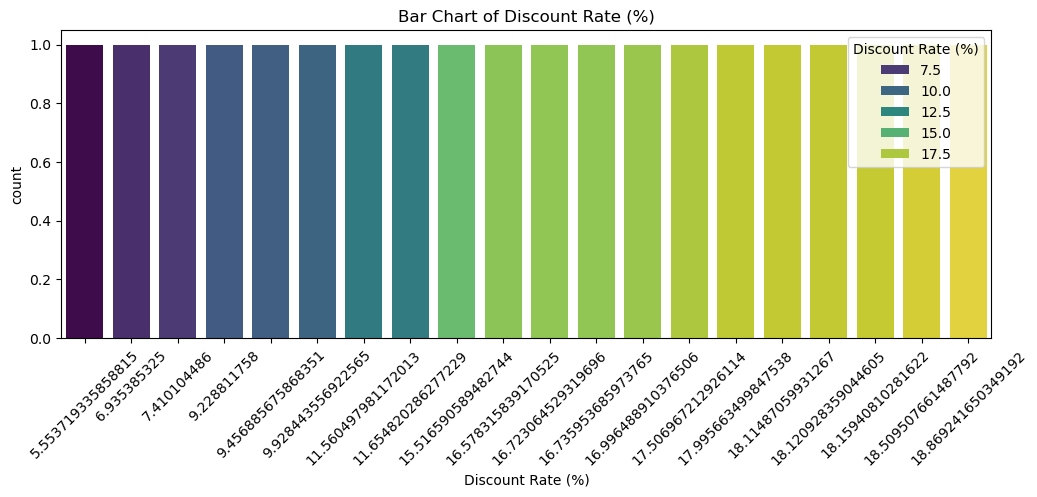

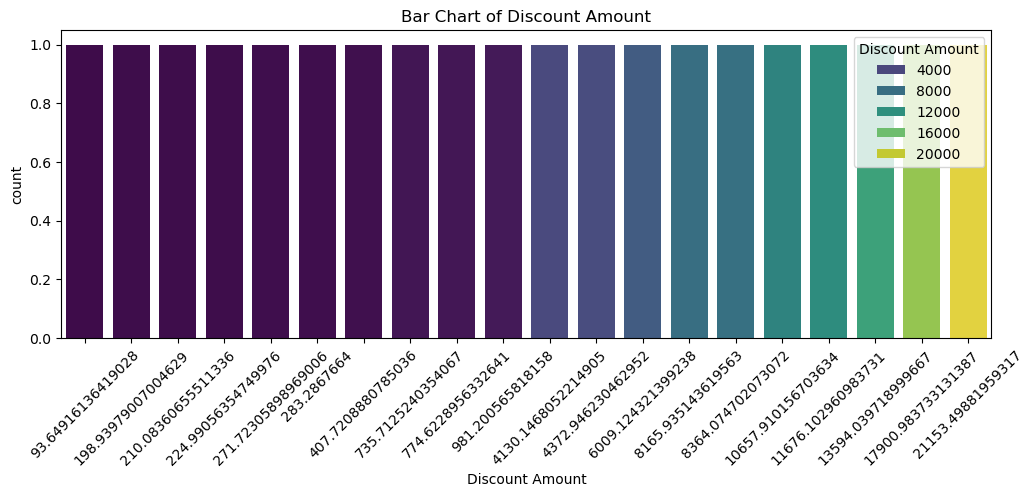

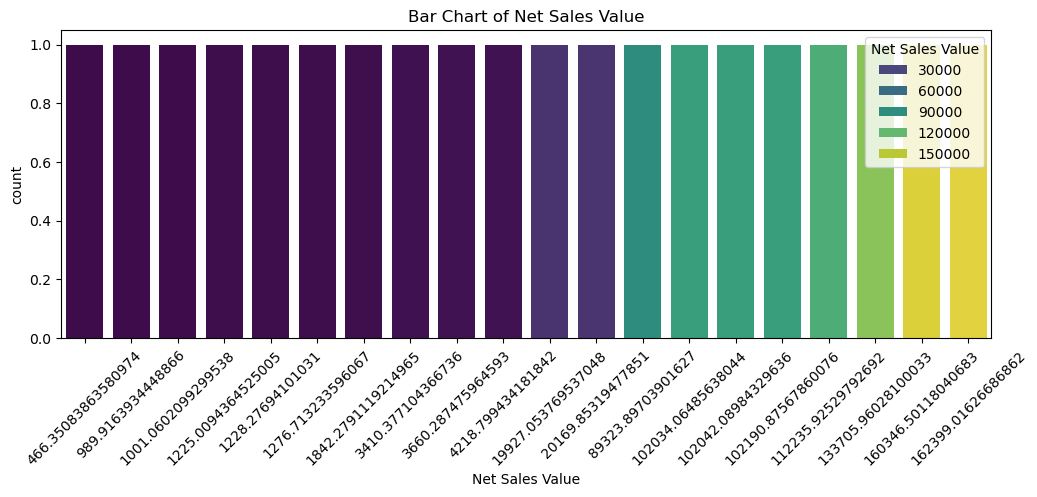

In [82]:
import matplotlib.ticker as mticker

for col,clr in zip(list(num_cols),clr_list):
    plt.figure(figsize=(12,4))
    sns.countplot(x=df[col].head(20),  hue=df[col].head(20),palette="viridis")
    plt.title(f"Bar Chart of {col}")
    plt.xticks(rotation=45)

    plt.show()

In [76]:
print("\n Conclusion:")
print("- Numerical analysis helped identify averages, spread, and common values in sales/discounts.")
print("- Histograms showed distribution patterns (normal, skewed, or multimodal).")
print("- Boxplots highlighted outliers (e.g., unusually high discounts).")
print("- Bar charts gave insight into categorical variables (e.g., product categories or regions).")


 Conclusion:
- Numerical analysis helped identify averages, spread, and common values in sales/discounts.
- Histograms showed distribution patterns (normal, skewed, or multimodal).
- Boxplots highlighted outliers (e.g., unusually high discounts).
- Bar charts gave insight into categorical variables (e.g., product categories or regions).
